In [1]:
import numpy as np
import xarray as xr
import pandas as pd
# from dask.diagnostics import ProgressBar
from xgcm.grid import Grid
import xrft
import gsw
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline
# ProgressBar().register()

In [2]:
!pip install seawater

  Using cached seawater-3.3.4-py3-none-any.whl


# Load data

In [3]:
from intake import open_catalog
import xmitgcm.llcreader as llcreader
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")

u = cat.LLC4320_SSU.to_dask()
v = cat.LLC4320_SSV.to_dask()
ssh = cat.LLC4320_SSH.to_dask()
ds = xr.merge([u, v,ssh])
ds = llcreader.llcmodel.faces_dataset_to_latlon(ds, metric_vector_pairs=[])

# reset_coords()则是将坐标变量转换为数据变量
coords = cat.LLC4320_grid.to_dask().reset_coords()
coords = llcreader.llcmodel.faces_dataset_to_latlon(coords)

In [25]:
ds

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 17280, j: 12960, time: 9030, i: 17280, j_g: 12960)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>

In [5]:
coords

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2,
              time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables: (12/30)
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    ...       ...
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>

In [27]:
# 假设 ds 是您的 xarray.Dataset 对象
# 假设给定的经度和纬度分别是 lon_value 和 lat_value

# 找到最接近给定经纬度的数据点
lon_value = 295
lat_value = 35

# 假设 coords 是您的 xarray.Dataset 对象
# 假设给定的经度和纬度分别是 lon_value 和 lat_value

# 使用 `where` 来找到与给定经纬度最接近的点
nearest_xc = coords['XC'].where(coords['XC'] == lon_value, drop=True)
nearest_yc = coords['YC'].where(coords['YC'] == lat_value, drop=True)

# 获取 i 和 j 索引
i_index = nearest_xc['i'].values[0] if nearest_xc['i'].size > 0 else None
j_index = nearest_yc['j'].values[0] if nearest_yc['j'].size > 0 else None

print(f"The nearest i-index is {i_index}, and the nearest j-index is {j_index}")



The nearest i-index is None, and the nearest j-index is None


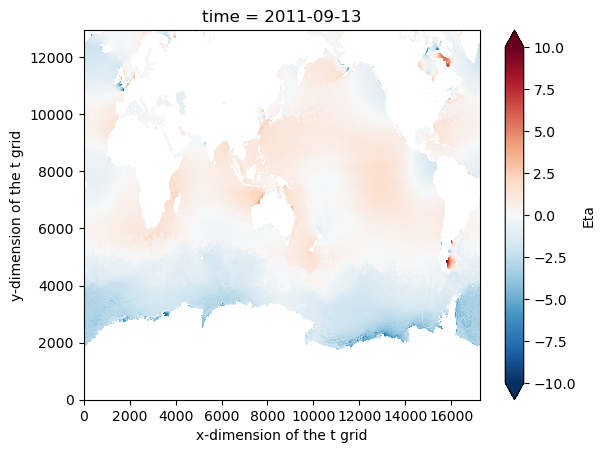

In [4]:
ds.Eta.isel(time=0,j=slice(0,None,10),i=slice(0,None,10)).plot(cmap='RdBu_r', vmin=-10,vmax=10)
# inferno
# RdBu_r

In [60]:
# ds.Eta.isel(time=0,j=slice(0,None,10),i=slice(0,None,10)).plot(cmap='RdBu_r', vmin=-10,vmax=10)

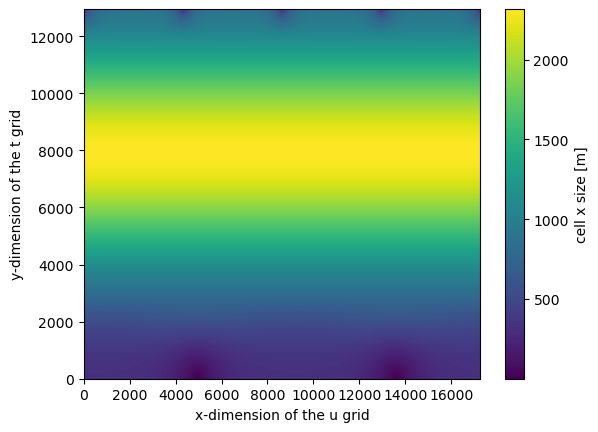

In [24]:
coords.dxC.isel(j=slice(0,None,10),i_g=slice(0,None,10)).plot()

In [22]:
coords.dyG.isel(j=slice(0,None,1),i_g=slice(0,None,1)).min().values

array(0.09944453, dtype=float32)

In [5]:
i1, i2 = 3000, 5000
# i1, i2 = 8000, 10000
j1, j2 = 3500, 6500

dxC_sel = coords.dxC.isel(i_g=slice(i1, i2), j=slice(j1, j2))
dyG_sel = coords.dyG.isel(i_g=slice(i1, i2), j=slice(j1, j2))
dyC_sel = coords.dyC.isel(i=slice(i1, i2), j_g=slice(j1, j2))
dxG_sel = coords.dxG.isel(i=slice(i1, i2), j_g=slice(j1, j2))
XC_sel = coords.XC.isel(i=slice(i1, i2), j=slice(j1, j2))
YC_sel = coords.YC.isel(i=slice(i1, i2), j=slice(j1, j2))


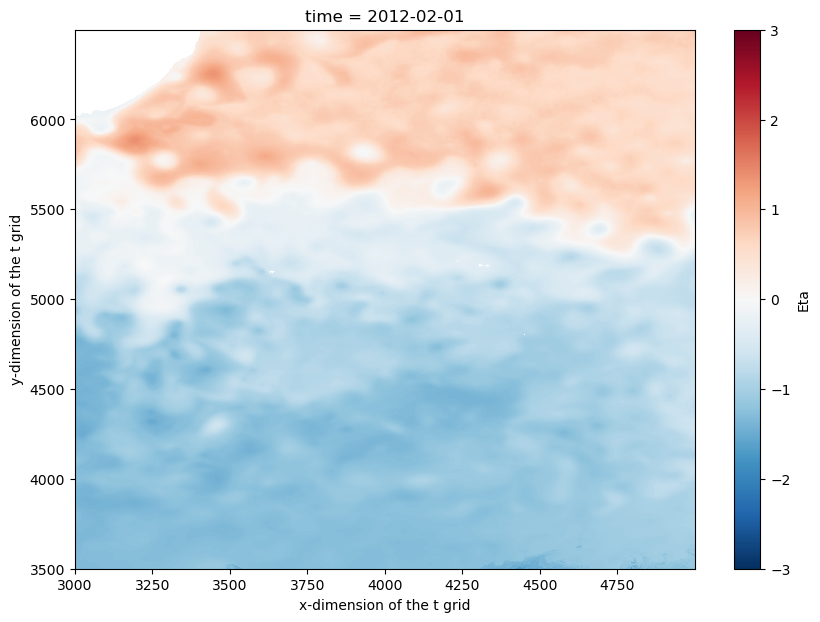

In [6]:
llcw0 = ds.sel(time=slice('2012-02-01','2012-04-30')).isel(i_g=slice(i1, i2), j=slice(j1, j2),
                                                         i=slice(i1, i2), j_g=slice(j1, j2))

fig, ax = plt.subplots(figsize=(10, 7))  # 设置图像大小
llcw0.Eta.isel(time=0).plot(ax=ax, cmap='RdBu_r', vmax=3, vmin=-3, rasterized=True, shading='auto')
# ax.set_aspect('equal')  # 设置长宽比为1:1

plt.show()


In [7]:
llcw2 = xr.merge([llcw0,  dxC_sel, dyC_sel, dxG_sel,
                      dyG_sel,XC_sel, YC_sel,dyG_sel])
llcw2

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 2000, j: 3000, time: 2160, i: 2000, j_g: 3000)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 3000 3001 3002 3003 3004 ... 4995 4996 4997 4998 4999
  * j        (j) int64 3500 3501 3502 3503 3504 ... 6495 6496 6497 6498 6499
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 3000 3001 3002 3003 3004 ... 4995 4996 4997 4998 4999
  * j_g      (j_g) int64 3500 3501 3502 3503 3504 ... 6495 6496 6497 6498 6499
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 820, 1320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 820, 1320), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 820, 1320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>

In [8]:
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
#     ('Z',): ['drC'], # Z distances
    # ('X', 'Y'): ['rA', 'rAs', 'rAw'] # Areas
}


gridllc = Grid(llcw2, periodic=[],
               coords={
#                        'Z':{'center':'k','outer':'k_p1'},
                       'Y':{'center':'j','left':'j_g'},
                       'X':{'center':'i','left':'i_g'}},
               metrics=metrics
              )
gridllc

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

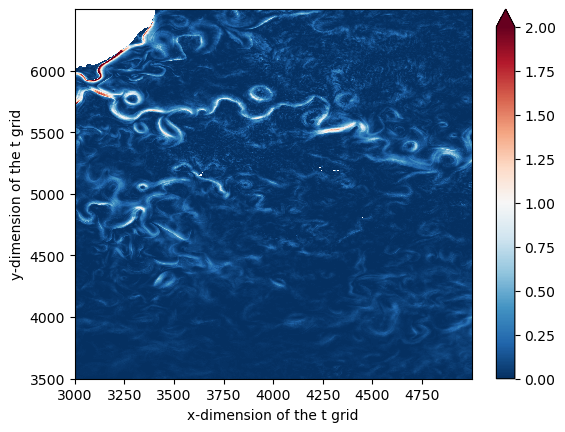

In [9]:
#  统一坐标轴之后，计算KE，坐标不一致无法计算。
tmp=.5*(gridllc.interp(llcw2.U.isel(time=0)**2,'X',boundary='extend')
                       + gridllc.interp(llcw2.V.isel(time=0)**2,'Y',boundary='extend')
                      )
tmp.plot(cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto')


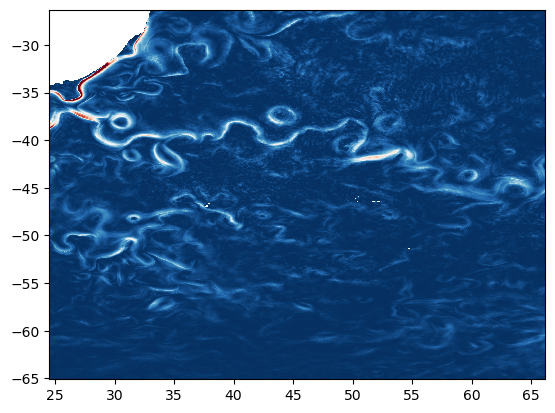

In [10]:
plt.pcolormesh(llcw2.XC, llcw2.YC,
                   .5*(gridllc.interp(llcw2.U.isel(time=0)**2,'X',boundary='extend')
                       + gridllc.interp(llcw2.V.isel(time=0)**2,'Y',boundary='extend')
                      ), 
                   cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto')

In [11]:
llcw2

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 2000, j: 3000, time: 2160, i: 2000, j_g: 3000)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 3000 3001 3002 3003 3004 ... 4995 4996 4997 4998 4999
  * j        (j) int64 3500 3501 3502 3503 3504 ... 6495 6496 6497 6498 6499
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 3000 3001 3002 3003 3004 ... 4995 4996 4997 4998 4999
  * j_g      (j_g) int64 3500 3501 3502 3503 3504 ... 6495 6496 6497 6498 6499
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 820, 1320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 820, 1320), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 820, 1320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(820, 1320), meta=np.ndarray>

In [86]:
i1, i2 = 4000, 4500
# i1, i2 = 8000, 10000
j1, j2 = 5500, 6000

dxC_sel = coords.dxC.isel(i_g=slice(i1, i2), j=slice(j1, j2))
dyG_sel = coords.dyG.isel(i_g=slice(i1, i2), j=slice(j1, j2))
dyC_sel = coords.dyC.isel(i=slice(i1, i2), j_g=slice(j1, j2))
dxG_sel = coords.dxG.isel(i=slice(i1, i2), j_g=slice(j1, j2))
XC_sel = coords.XC.isel(i=slice(i1, i2), j=slice(j1, j2))
YC_sel = coords.YC.isel(i=slice(i1, i2), j=slice(j1, j2))
llcw_test = ds.sel(time=slice('2012-02-01','2012-04-30')).isel(i_g=slice(i1, i2), j=slice(j1, j2),
                                                         i=slice(i1, i2), j_g=slice(j1, j2))
llcw_test1 = xr.merge([llcw_test,  dxC_sel, dyC_sel, dxG_sel,
                      dyG_sel,XC_sel, YC_sel,dyG_sel])
llcw_test1

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 500, j: 500, time: 2160, i: 500, j_g: 500)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 4000 4001 4002 4003 4004 ... 4495 4496 4497 4498 4499
  * j        (j) int64 5500 5501 5502 5503 5504 ... 5995 5996 5997 5998 5999
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 4000 4001 4002 4003 4004 ... 4495 4496 4497 4498 4499
  * j_g      (j_g) int64 5500 5501 5502 5503 5504 ... 5995 5996 5997 5998 5999
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 500, 320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 500, 320), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 500, 320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>

In [87]:
grid_ok = Grid(llcw_test1, periodic=[],
               coords={
#                        'Z':{'center':'k','outer':'k_p1'},
                       'Y':{'center':'j','left':'j_g'},
                       'X':{'center':'i','left':'i_g'}},
               metrics=metrics
              )
grid_ok

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

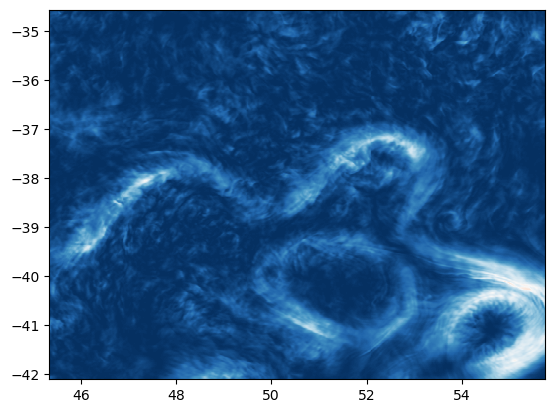

In [88]:
plt.pcolormesh(llcw_test1.XC, llcw_test1.YC,
                   .5*(grid_ok.interp(llcw_test1.U.isel(time=1000)**2,'X',boundary='extend')
                       + grid_ok.interp(llcw_test1.V.isel(time=1000)**2,'Y',boundary='extend')
                      ), 
                   cmap='RdBu_r', vmax=2, vmin=0, rasterized=True, shading='auto')

In [15]:
def mean_notisnan(inmatrix, axis=None):
    a_zero = np.nan_to_num(inmatrix)  # 将 NaN 转为 0
    mask = np.isfinite(inmatrix).astype(int)  # 创建一个掩码，非 NaN 为 1，NaN 为 0
    
    nmtr = np.sum(a_zero, axis=axis)
    dnmr = np.sum(mask, axis=axis)
    
    outmatrix = np.zeros_like(nmtr, dtype=float)
    outmatrix[dnmr > 0] = nmtr[dnmr > 0] / dnmr[dnmr > 0]
    
    return outmatrix


# 测试函数
inmatrix = np.array([[np.nan, 2, 3], [4, np.nan, 6], [7, 8, 9]])
ave_dim = 1  # 沿着第一个维度计算平均值
result = mean_notisnan(inmatrix, ave_dim)
print("输出矩阵：")
print(result)

输出矩阵：
[2.5 5.  8. ]


In [16]:
import numpy as np

def handleNanValues(temhs, a):
    i, j = np.where(np.isnan(temhs))  # 找到所有NaN值的位置

    # 创建一个输出数组并初始化为输入数组的复制
    processedData = np.copy(temhs)

    for x, y in zip(i, j):
        # 处理第一种情况：x和y都小于等于20
        if x <= 20 and y <= 20:
            processedData[x, y] = mean_notisnan(mean_notisnan(temhs[x:x+a+1, y:y+a+1], axis=0))

        # 处理第二种情况：x大于20，y小于等于20
        elif x > 20 and y <= 20:
            processedData[x, y] = mean_notisnan(mean_notisnan(temhs[x-a:x+1, y:y+a+1], axis=0))

        # 处理第三种情况：x小于等于20，y大于20
        elif x <= 20 and y > 20:
            processedData[x, y] = mean_notisnan(mean_notisnan(temhs[x:x+a+1, y-a:y+1], axis=0))

        # 处理第四种情况：x和y都大于20
        else:
            processedData[x, y] = mean_notisnan(mean_notisnan(temhs[x-a:x+1, y-a:y+1], axis=0))

    return processedData

# 测试函数
temhs = np.array([[np.nan, 2, 3], [4, np.nan, 6], [7, 8, 9]])
result = handleNanValues(temhs, 1)
print("处理后的数据：")
print(result)


处理后的数据：
[[3.   2.   3.  ]
 [4.   7.75 6.  ]
 [7.   8.   9.  ]]


In [17]:
def wang_detrend(in_matrix):
    # 获取矩阵尺寸
    m, n = in_matrix.shape

    # 首先去掉一个区域的平均值
    mean_in = np.mean(in_matrix)
    in_matrix = in_matrix - mean_in
    
    # 创建坐标网格
    x0 = np.arange(1, m+1)
    y0 = np.arange(1, n+1)
    x, y = np.meshgrid(x0, y0)

    # 将输入矩阵转换为列向量
    tempin = in_matrix.ravel()
    X = x.ravel()
    Y = y.ravel()

    # 计算线性平面的系数
    C = np.column_stack((X, Y))
    D = np.linalg.lstsq(C, tempin, rcond=None)[0]
    linearin = D[0] * X + D[1] * Y

    # 去除线性平面
    out1 = tempin - linearin
    
    # 将输出转换回原始矩阵形状
    out = out1.reshape(m, n)

    return out

# 示例
in_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
out_matrix = wang_detrend(in_matrix)
print("输出矩阵：")
print(out_matrix)


输出矩阵：
[[-4.30769231 -2.46153846 -0.61538462]
 [-2.46153846 -0.61538462  1.23076923]
 [-0.61538462  1.23076923  3.07692308]]


In [18]:
import numpy as np
import scipy.fftpack as fft

def psi2flux2v(dx, dy, psi):
    nx, ny = psi.shape

    # Size of domain
    Lx = dx * nx
    Ly = dy * ny

    # Check if nx is odd or even
    if nx % 2 == 0:
        Nx = nx // 2
        wn_x = 2 * np.pi * np.hstack((np.arange(Nx + 1), np.arange(-(Nx - 1), 0))) / Lx
    else:
        Nx = (nx - 1) // 2
        wn_x = 2 * np.pi * np.hstack((np.arange(Nx + 1), -np.arange(Nx))) / Lx

    # Check if ny is odd or even
    if ny % 2 == 0:
        Ny = ny // 2
        wn_y = 2 * np.pi * np.hstack((np.arange(Ny + 1), np.arange(-(Ny - 1), 0))) / Ly
    else:
        Ny = (ny - 1) // 2
        wn_y = 2 * np.pi * np.hstack((np.arange(Ny + 1), -np.arange(Ny))) / Ly

    kx, ky = np.meshgrid(wn_x, wn_y)
    wvsq = kx * kx + ky * ky

    u = np.real(fft.ifft2(-1j * ky * fft.fft2(psi)))
    v = np.real(fft.ifft2(1j * kx * fft.fft2(psi)))
    q = np.real(fft.ifft2(-wvsq * fft.fft2(psi)))

    ddxq = np.real(fft.ifft2(1j * kx * fft.fft2(q)))
    ddyq = np.real(fft.ifft2(1j * ky * fft.fft2(q)))

    Jpsiq = u * ddxq + v * ddyq

    Tkxky = np.real(np.conj(fft.fft2(psi)) * fft.fft2(Jpsiq)) / (nx**2 * ny**2)

    wn_max = np.sqrt(np.max(wn_y)**2 + np.max(wn_x)**2) / np.sqrt(2)
    dk = min((2 * np.pi / Lx), (2 * np.pi / Ly))
    step_max = min(Nx, Ny) + 1

    flux = np.zeros(step_max)
    wn_step = np.zeros(step_max)

    for step in range(1, step_max + 1):
        k = dk * step
        index = np.where(wvsq >= k**2)
        flux[step - 1] = np.sum(Tkxky[index])
        wn_step[step - 1] = k
        # wn_step[step - 1] = k.item()
        # wn_step[step - 1] = k[0]  # 使用索引 0 获取 k 的值，将其作为标量存储在 wn_step 中



    T = -(flux[1:] - flux[:-1]) / dk
    wn_T = (wn_step[1:] + wn_step[:-1]) / 2
    wn_flux = wn_step

    return flux, wn_flux, T, wn_T, u, v, q

# 使用示例：
# 使用函数的示例
dx = 1.0
dy = 1.0
psi = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

flux, wn_flux, T, wn_T, u, v, q = psi2flux2v(dx, dy, psi)
print("Flux:", flux)
print("wn_flux:", wn_flux)
print("T:", T)
print("wn_T:", wn_T)
print("u:", u)
print("v:", v)
print("q:", q)

Flux: [9.86864911e-17 0.00000000e+00]
wn_flux: [2.0943951 4.1887902]
T: [4.71193286e-17]
wn_T: [3.14159265]
u: [[ 1.81379936  1.81379936  1.81379936]
 [-3.62759873 -3.62759873 -3.62759873]
 [ 1.81379936  1.81379936  1.81379936]]
v: [[-0.60459979  1.20919958 -0.60459979]
 [-0.60459979  1.20919958 -0.60459979]
 [-0.60459979  1.20919958 -0.60459979]]
q: [[ 8.77298169e+00  6.57973627e+00  4.38649084e+00]
 [ 2.19324542e+00 -8.88178420e-16 -2.19324542e+00]
 [-4.38649084e+00 -6.57973627e+00 -8.77298169e+00]]


In [19]:
import time
import gsw
import seawater as sw
import scipy
import warnings
import numpy as np
import xarray as xr



In [90]:
# 假设 llcw_test 是一个 xarray 数据集或数据数组
llcw_test2 = llcw_test1.isel(i=slice(None, None, 12), j=slice(None, None, 12),i_g=slice(None, None, 12),j_g=slice(None, None, 12))
llcw_test2

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 42, j: 42, time: 2160, i: 42, j_g: 42)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 4000 4012 4024 4036 4048 ... 4444 4456 4468 4480 4492
  * j        (j) int64 5500 5512 5524 5536 5548 ... 5944 5956 5968 5980 5992
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 4000 4012 4024 4036 4048 ... 4444 4456 4468 4480 4492
  * j_g      (j_g) int64 5500 5512 5524 5536 5548 ... 5944 5956 5968 5980 5992
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 42, 27), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 42, 27), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 42, 27), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(42, 27), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(42, 27), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(42, 27), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(42, 27), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(42, 27), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(42, 27), meta=np.ndarray>

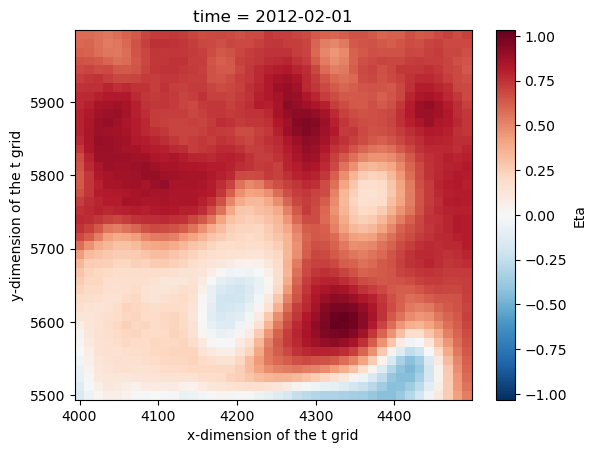

In [91]:
llcw_test2.Eta.isel(time=0).plot()

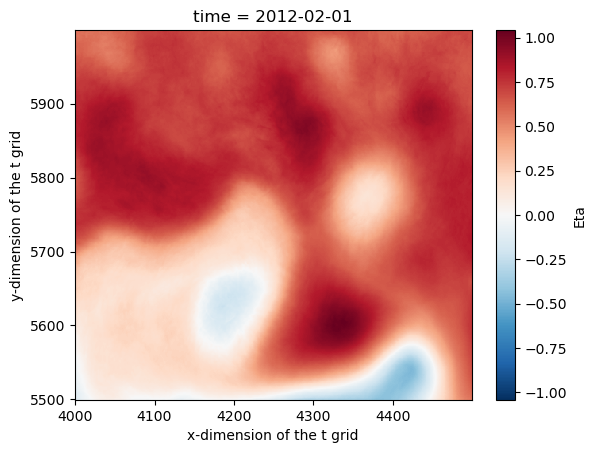

In [92]:
llcw_test1.Eta.isel(time=0).plot()

In [93]:
from scipy.signal import hann
import numpy as np
from scipy import interpolate
import matplotlib.patches as patches

# 计算m和n的长度
inter = 3
ex = inter  # 另一个参数（用途未指定）
e = inter  # 另一个参数（用途未指定）

# 初始化窗口和物理参数
m0 = 32
# 创建周期性汉宁窗
w_han = np.hanning(m0)
C, D = np.meshgrid(w_han, w_han)

g = 9.8
# re = 6.371e+6  # 地球半径（单位：米）
a = 8  # 另一个参数（用途未指定）

number = 100

print("number:", number)

number: 100


In [117]:
m = 140
n = 140
# Initialize result matrices
flux = np.nan * np.ones((m, n, m0 // 2 + 1))
wn_flux = np.nan * np.ones((m, n, m0 // 2 + 1))
flux

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

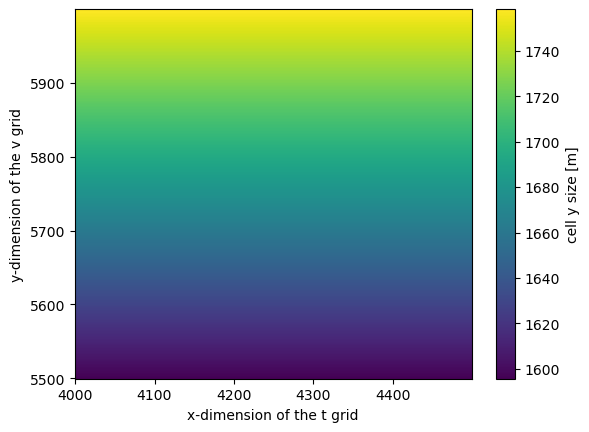

In [100]:
llcw_test1.dyC.plot()

In [99]:
dx_list = sw.dist([llcw_test1.YC.isel(i=0,j=0), llcw_test1.YC.isel(i=0,j=1)], [llcw_test1.XC.isel(i=0,j=0), llcw_test1.XC.isel(i=0,j=0)], units='km')
dx_list

(array([1.5950949], dtype=float32), array([90.], dtype=float32))

In [82]:
llcw_test1.YC.isel(i=0,j=1).values

array(-65.07196, dtype=float32)

In [108]:
llcw_test1

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 500, j: 500, time: 2160, i: 500, j_g: 500)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 4000 4001 4002 4003 4004 ... 4495 4496 4497 4498 4499
  * j        (j) int64 5500 5501 5502 5503 5504 ... 5995 5996 5997 5998 5999
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
  * i        (i) int64 4000 4001 4002 4003 4004 ... 4495 4496 4497 4498 4499
  * j_g      (j_g) int64 5500 5501 5502 5503 5504 ... 5995 5996 5997 5998 5999
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 500, 320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 500, 320), meta=np.ndarray>
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 500, 320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(500, 320), meta=np.ndarray>

In [107]:
dx_list = llcw_test1.dxC.isel(j=60,i_g=60).values
dx_list

array(1741.875, dtype=float32)

In [111]:
# Main loop to iterate through each NetCDF file
for k in range(1, 3):
    ds0 = llcw_test1.isel(time=k)
    ssh = ds0['Eta']  
    shh = np.array(ssh)
    sh = shh
    # print(sh.shape)
    for k1 in range(40, 200+1 , inter):
        
        dx_list = llcw_test1.dxC.isel(j=60,i_g=60).values
        dx = dx_list
        dy_list = llcw_test1.dyC.isel(j_g=60,i=60).values
        dy = dy_list
        
        ff = sw.f(llcw_test1.YC.isel(j=k1,i=0))
        
        for k2 in range(40, 200+1 , inter):
            temhs = sh[k1 - 15:k1 + 17, k2 - 15:k2 + 17]
            rate = np.sum(np.isnan(temhs)) / (m0 * m0)        

            if rate <= 0.05:
                temhs = handleNanValues(temhs, a)
                temp2 = wang_detrend(temhs)
                temp3 = temp2 * C * D
                temp4 = temp3 * (g / ff)
                # fl, wn = psi2flux2v(dx, dy, temp4)
                fl, wn, *_ = psi2flux2v(dx, dy, temp4)


                flux[(k1 - 40) // ex, (k2 - 40) // e, :] = fl
                wn_squeezed = np.squeeze(wn)
                wn_flux[(k1 - 40) // ex, (k2 - 40) // e, :] = wn_squeezed

    scipy.io.savemat(f"./output/{k}.mat", {'flux': flux, 'wn_flux': wn_flux})

In [43]:
dx_list

array(979.72375, dtype=float32)

In [37]:
dx = dx_list * 12
dx

11756.68505859375

In [40]:
llcw_test2.dxC.isel(j=1,i_g=1).values

array(979.72375, dtype=float32)

In [41]:
llcw_test2.dyC.isel(j_g=1,i=1).values

array(965.0072, dtype=float32)

In [112]:
# 数据存储路径
bb = './output/'

# 获取结果矩阵的大小（以第一个文件为例）
file = bb + '1.mat'
data = scipy.io.loadmat(file)
flux = data['flux']  # 假设MAT文件中存储的变量名是'flux'
m1, m2, m3 = flux.shape

# 初始化累加矩阵
fluxa = np.zeros((m1, m2, m3))

fluxa.shape
# fluxa

(140, 140, 17)

/tmp/ipykernel_1186/550173033.py:11: RuntimeWarning: Mean of empty slice
  flux_b = np.nanmean(np.nanmean(flux_a, axis=1), axis=0)
/tmp/ipykernel_1186/550173033.py:20: RuntimeWarning: Mean of empty slice
  wn = np.nanmean(np.nanmean(wn_flux, axis=1), axis=0) * 1e6


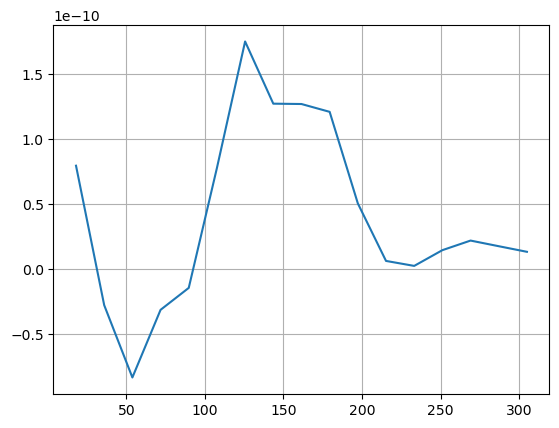

In [115]:
# 聚合所有的flux和wn_flux数据
# number = 10  # 请根据你的实际情况设置这个值
for k in range(1, 3):
    file = bb + str(k) + '.mat'
    data = scipy.io.loadmat(file)
    flux = data['flux']  # 假设MAT文件中存储的变量名是'flux'
    fluxa += flux  # 累加flux

# 计算平均值
flux_a = fluxa / number
flux_b = np.nanmean(np.nanmean(flux_a, axis=1), axis=0)

# if np.isnan(flux_a).all():
#     flux_b = np.nan  # 或其他适当的值
# else:
#     flux_b = np.nanmean(np.nanmean(flux_a, axis=1), axis=0)

    
wn_flux = data['wn_flux']  # 假设最后一个MAT文件中存储的wn_flux可用
wn = np.nanmean(np.nanmean(wn_flux, axis=1), axis=0) * 1e6

# 绘制图像
plt.plot(wn / (2 * np.pi), flux_b)
plt.grid(True)
# plt.xticks(np.arange(0, 17, 1))
# plt.savefig('sample_plot.pdf')
plt.show()